## Perfumeの全曲歌詞を解析してWordCloudを作ってみた

In [1]:
#まずは、必要なライブラリをごっそりインポートしておく
import requests
!pip install bs4
from bs4 import BeautifulSoup
import pandas as pd
import time
!pip install lxml
import lxml
import matplotlib.pyplot as plt

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=f5ab0abd420a3688b9ce97e500e8120cf5016c6ec0942d4bf9ccfe17e04fb6f9
  Stored in directory: /Users/sakikawamura/Library/Caches/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


In [2]:
#スクレイピングしたデータを入れる表を作成
list_df = pd.DataFrame(columns=['歌詞'])

for page in range(1, 3):
    #曲ページ先頭アドレス
    base_url = 'https://www.uta-net.com'

    #歌詞一覧ページ
    url = 'https://www.uta-net.com/artist/5555/' #+ str(page) + '/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'lxml')
    links = soup.find_all('td', class_='side td1')
    for link in links:
        a = base_url + (link.a.get('href'))

        #歌詞詳細ページ
        response = requests.get(a)
        soup = BeautifulSoup(response.text, 'lxml')
        song_lyrics = soup.find('div', itemprop='lyrics')
        song_lyric = song_lyrics.text
        song_lyric = song_lyric.replace('\n','')
        #サーバーに負荷を与えないため1秒待機
        time.sleep(1)

        #取得した歌詞を表に追加
        tmp_se = pd.DataFrame([song_lyric], index=list_df.columns).T
        list_df = list_df.append(tmp_se)

print(list_df)

#csv保存
list_df.to_csv('Perfume_song_list.csv', mode = 'w', encoding='utf-8')

                                                   歌詞
0   キミをどんなに想い続けてもあたしにできることなんかなくて夕焼けみたいに沈む気持ちを胸にしまい...
0   おねがいのときだけかわいくkiss kiss kissずるいなんて言わせないよキミもうれしい...
0   好奇心まかせの　日々に退屈してひとつのことだけ　追いかけてみるのが実は難しい　本気になるくら...
0   願いを込めてちょっと気になってるIf you wanna love meそう　If you ...
0   ギリギリに笑って　ため息で濁すたかが恋ひとつ　ただ　落としただけなのにニコニコと笑って　ノロ...
..                                                ...
0   心を上向きにステキの　さあ始まり123　Find a great viewpointHere...
0   小さな宝物　持っていたのにどうして忘れちゃうの？　もう触ってないキミを取り巻いた　空気はいつ...
0   ストレイト　ドキドキする視線はまるでレーザービーム心をシュワりと突き刺すの虹色のラブビーム実...
0   つまらないって顔して　いつも目を合わさない何か少し褒めると　ハニカミ笑いのキミ二人並んで歩く...
0   ワンルーム・ディスコディスコ　ディスコ　ワンルーム・ディスコディスコ　ディスコディスコ　ディ...

[216 rows x 1 columns]


In [3]:
!pip install janome
from janome.tokenizer import Tokenizer
import pandas as pd
import re

#list.csvファイルを読み込み
df_file = pd.read_csv('Perfume_song_list.csv', encoding='utf-8')

song_lyrics = df_file['歌詞'].tolist()

t = Tokenizer()

results = []

for s in song_lyrics:
    tokens = t.tokenize(s)

    r = []

    for tok in tokens:
        if tok.base_form == '*':
            word = tok.surface
        else:
            word = tok.base_form

        ps = tok.part_of_speech

        hinshi = ps.split(',')[0]

        if hinshi in ['名詞', '形容詞', '動詞', '副詞']:
            r.append(word)

    rl = (' '.join(r)).strip()
    results.append(rl)
    #余計な文字コードの置き換え
    result = [i.replace('\u3000','') for i in results]

text_file = 'perfume_list.txt'
with open(text_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(result))

     |████████████████████████████████| 19.7 MB 5.1 MB/s eta 0:00:01


In [4]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


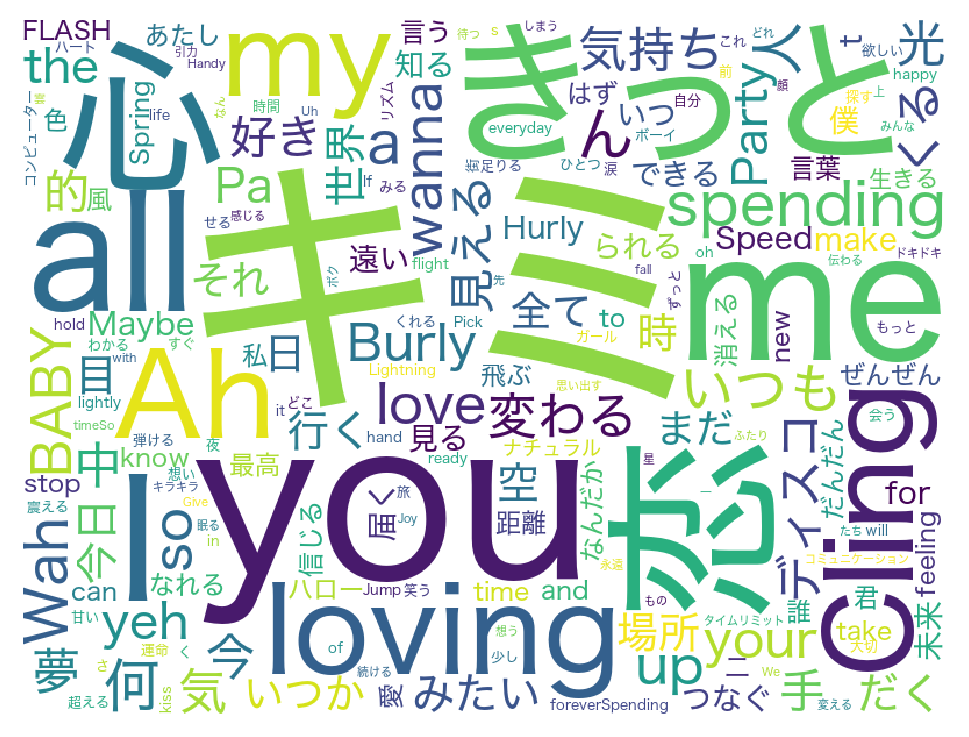

In [18]:
from wordcloud import WordCloud
from os import path

text_file = open('perfume_list.txt', encoding='utf-8')
text = text_file.read()

from PIL import Image, ImageDraw, ImageFont

#日本語のフォントパス
font = './Users/sakikawamura/Library/Fonts/ヒラギノ角ゴシック W4.ttc'

#無意味そうな単語除去
stop_words = ['そう', 'ない', 'いる', 'する', 'まま', 'よう', 'てる', 'なる', 'こと', 'もう', 'いい', 'ある', 'ゆく', 'れる','の']

wordcloud = WordCloud(background_color='white', max_words=200, font_path=font, width=800, height=600, collocations=False, stopwords=set(stop_words)).generate(text)

#画像はwordcloud.pyファイルと同じディレクトリにpng保存
wordcloud.to_file('./wordcloud_p.png')

plt.figure(figsize=(6,6), dpi=200)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [46]:
from PIL import Image
import numpy as np

# マスクを作成する
mask_array = np.array(Image.open('perfume.png'))

# ワードクラウドを作成する
wc = WordCloud(mask=mask_array, background_color='black', colormap='cool', max_words=200, font_path=font, width=1000, height=1000, collocations=False, stopwords=set(stop_words)).generate(text)

# そのままファイルに保存する場合はto_fileメソッドで
wc.to_file('jpg_perfume.png')

# PILで表示する
image_array = wc.to_array()
img = Image.fromarray(image_array)
img.show()

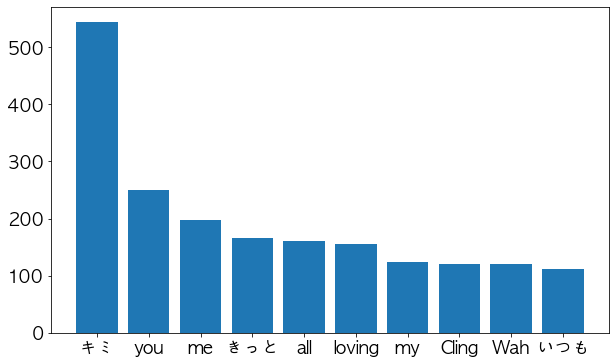

<Figure size 432x288 with 0 Axes>

In [34]:
import collections
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

#2文字以上、stopwordsに指定されていない単語をリスト化する。
text_list = [w for w in  text.split() if w not in stop_words and len(w) > 1]
counter = collections.Counter(text_list)
#TOP10を取得
word_10  = dict(counter.most_common(10))

#棒グラフで表示
plt.figure(figsize=(10, 6))
plt.bar(range(len(word_10)),list(word_10.values()), align='center')
plt.xticks(range(len(word_10)), list(word_10.keys()))
plt.tick_params(labelsize=18)
plt.show()
plt.savefig("word-ranking.png")

In [20]:
word_10

{'キミ': 544,
 'you': 250,
 'me': 198,
 'きっと': 166,
 'all': 160,
 'loving': 156,
 'my': 124,
 'Cling': 120,
 'Wah': 120,
 'いつも': 112}

In [31]:
word_20  = dict(counter.most_common(20))
word_20

{'キミ': 544,
 'you': 250,
 'me': 198,
 'きっと': 166,
 'all': 160,
 'loving': 156,
 'my': 124,
 'Cling': 120,
 'Wah': 120,
 'いつも': 112,
 'spending': 110,
 'wanna': 104,
 'up': 94,
 '変わる': 92,
 'love': 92,
 'Ah': 90,
 'Burly': 90,
 '気持ち': 84,
 'so': 84,
 'your': 84}